In [1]:
import sys
sys.path.insert(0, '/Users/taylorjweidman/PROJECTS/NB_Writer')
from NB_Writer import *

NB_Write('HW_01', title='Econ 0150 | Spring 2025 | Homework 01 \linebreak \\textit{\large{Due: Friday, Jan. 17}}')

Homework is designed to both test your knowlege and challenge you to apply familiar concepts in new applications. Answer clearly and completely. You are welcomed and encouraged to work in groups so long as your work is your own. Use the datafiles to answer the following questions. Then submit your figures and answers to Gradescope.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

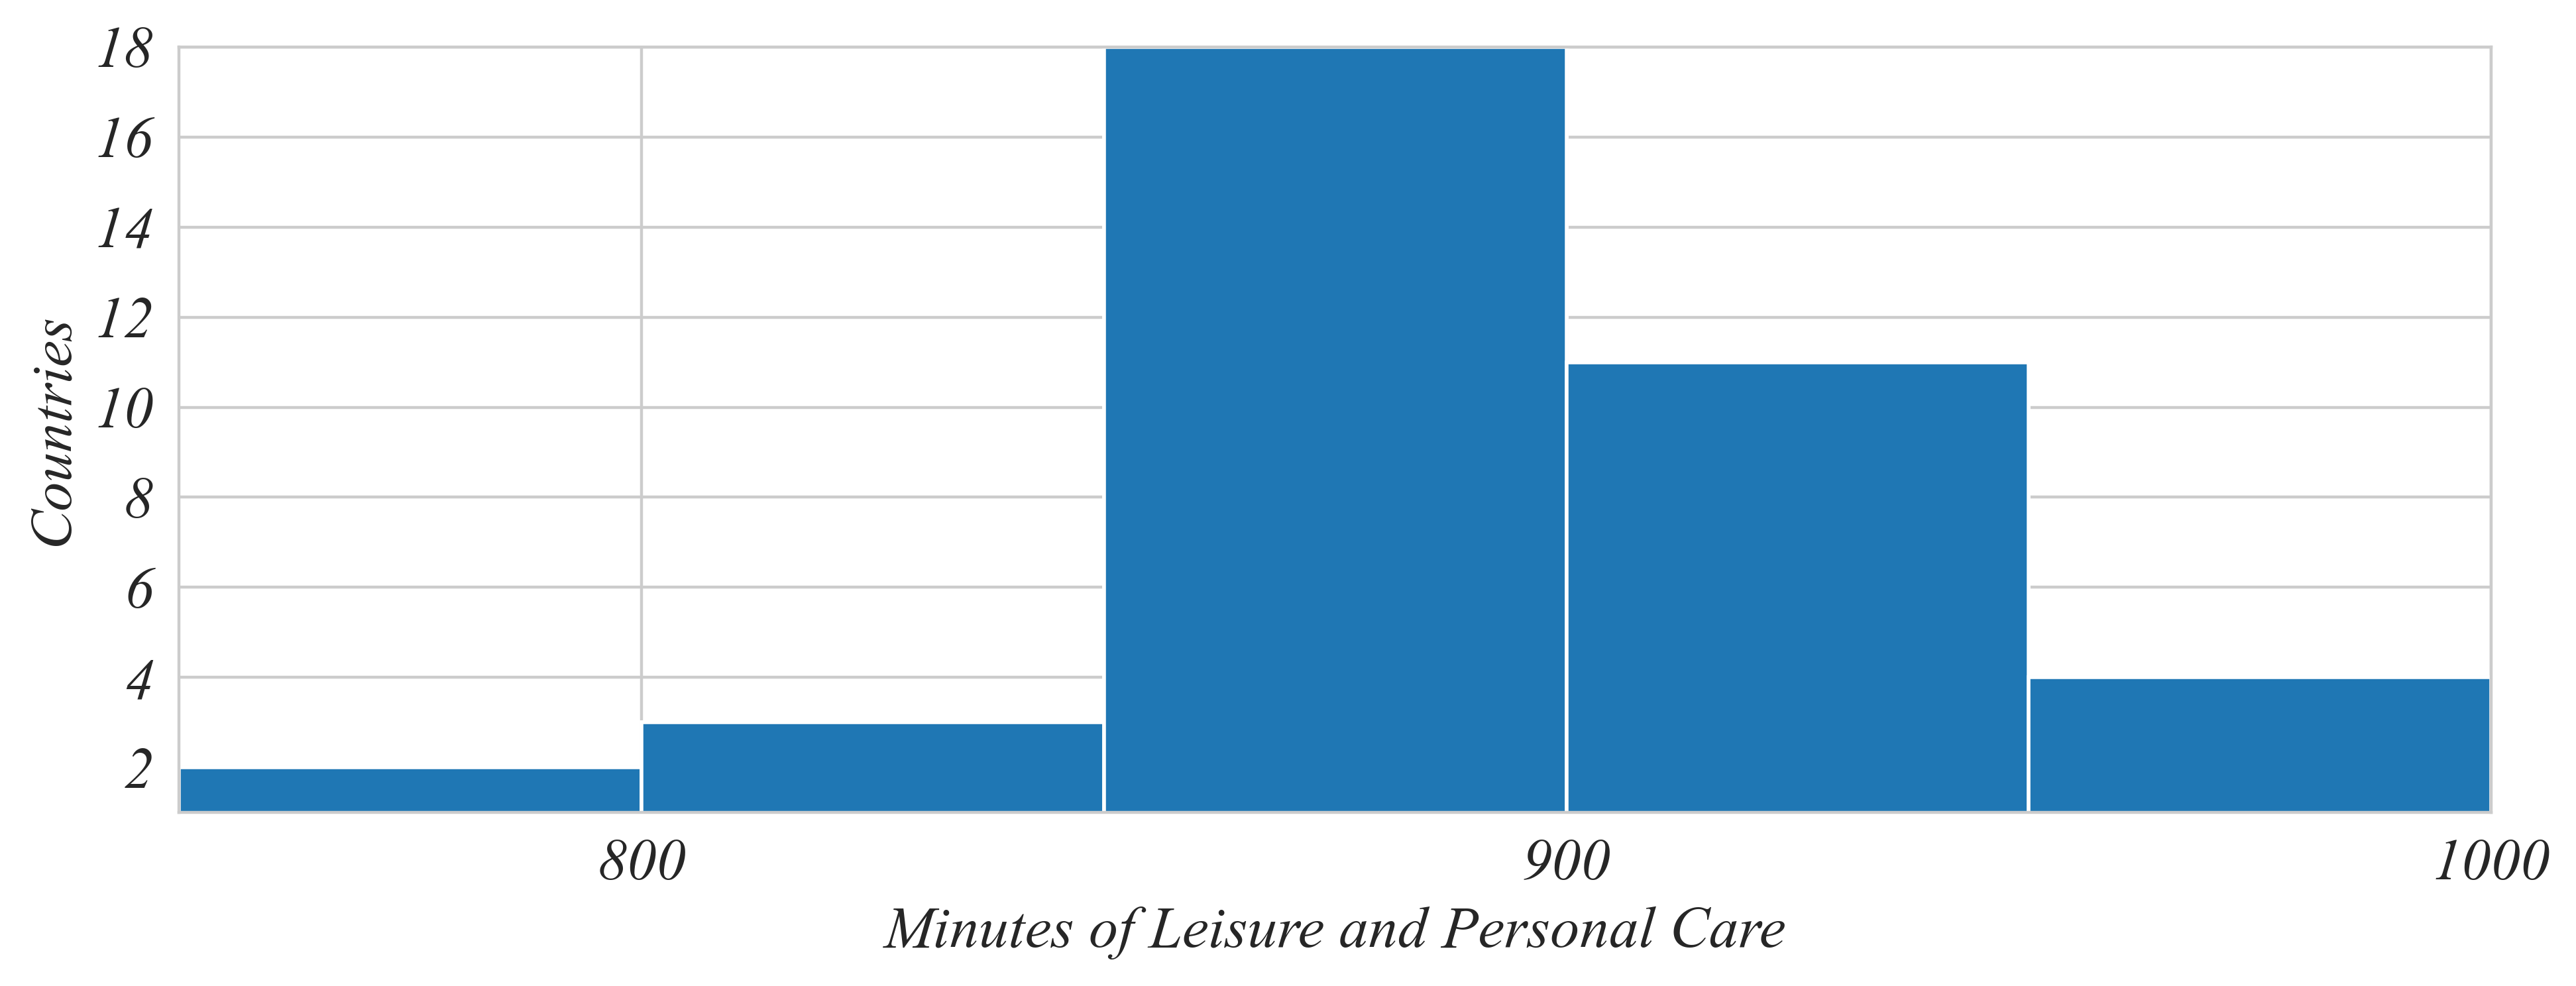

In [69]:
leisure = pd.read_csv('Data/Leisure_Time_OECD.csv')
leisure['Minutes'] = leisure['TIME']*60
leisure.head()

sns.set_style('whitegrid')
plt.rcParams.update({
    'font.family': 'serif',        # Set the font family
    'font.serif': ['Times New Roman'], # Use a specific serif font
    'font.size': 16,               # Set the general font size
    'axes.titlesize': 16,          # Set the font size of the title
    'axes.labelsize': 16,           # Set the font size of axis labels
    'font.style': 'italic',
})

plt.figure(figsize=(10, 4), dpi=400)

plt.hist(
    leisure.Minutes, 
    bins=[750, 800, 850, 900, 950, 1000],
    color='blue'
)
#plt.xlabel('Age Groups')
max_freq = max(plt.hist(leisure.Minutes, bins=[750, 800, 850, 900, 950, 1000])[0])  # Get the maximum frequency
plt.yticks(range(2, int(max_freq) + 1,2))
plt.ylim(1,18)
plt.ylabel('Countries')

plt.xlim(750,1000)
plt.xticks([800, 900, 1000])
plt.xlabel('Minutes of Leisure and Personal Care')
plt.grid(True)

#plt.title('Average Minutes of Leisure and Personal Care')
plt.tight_layout()
for spine in ax.spines.values():
    spine.set_edgecolor('white')
plt.savefig('Figures/HW_1_Q1.png')

/opt/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
/opt/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:895: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
/opt/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


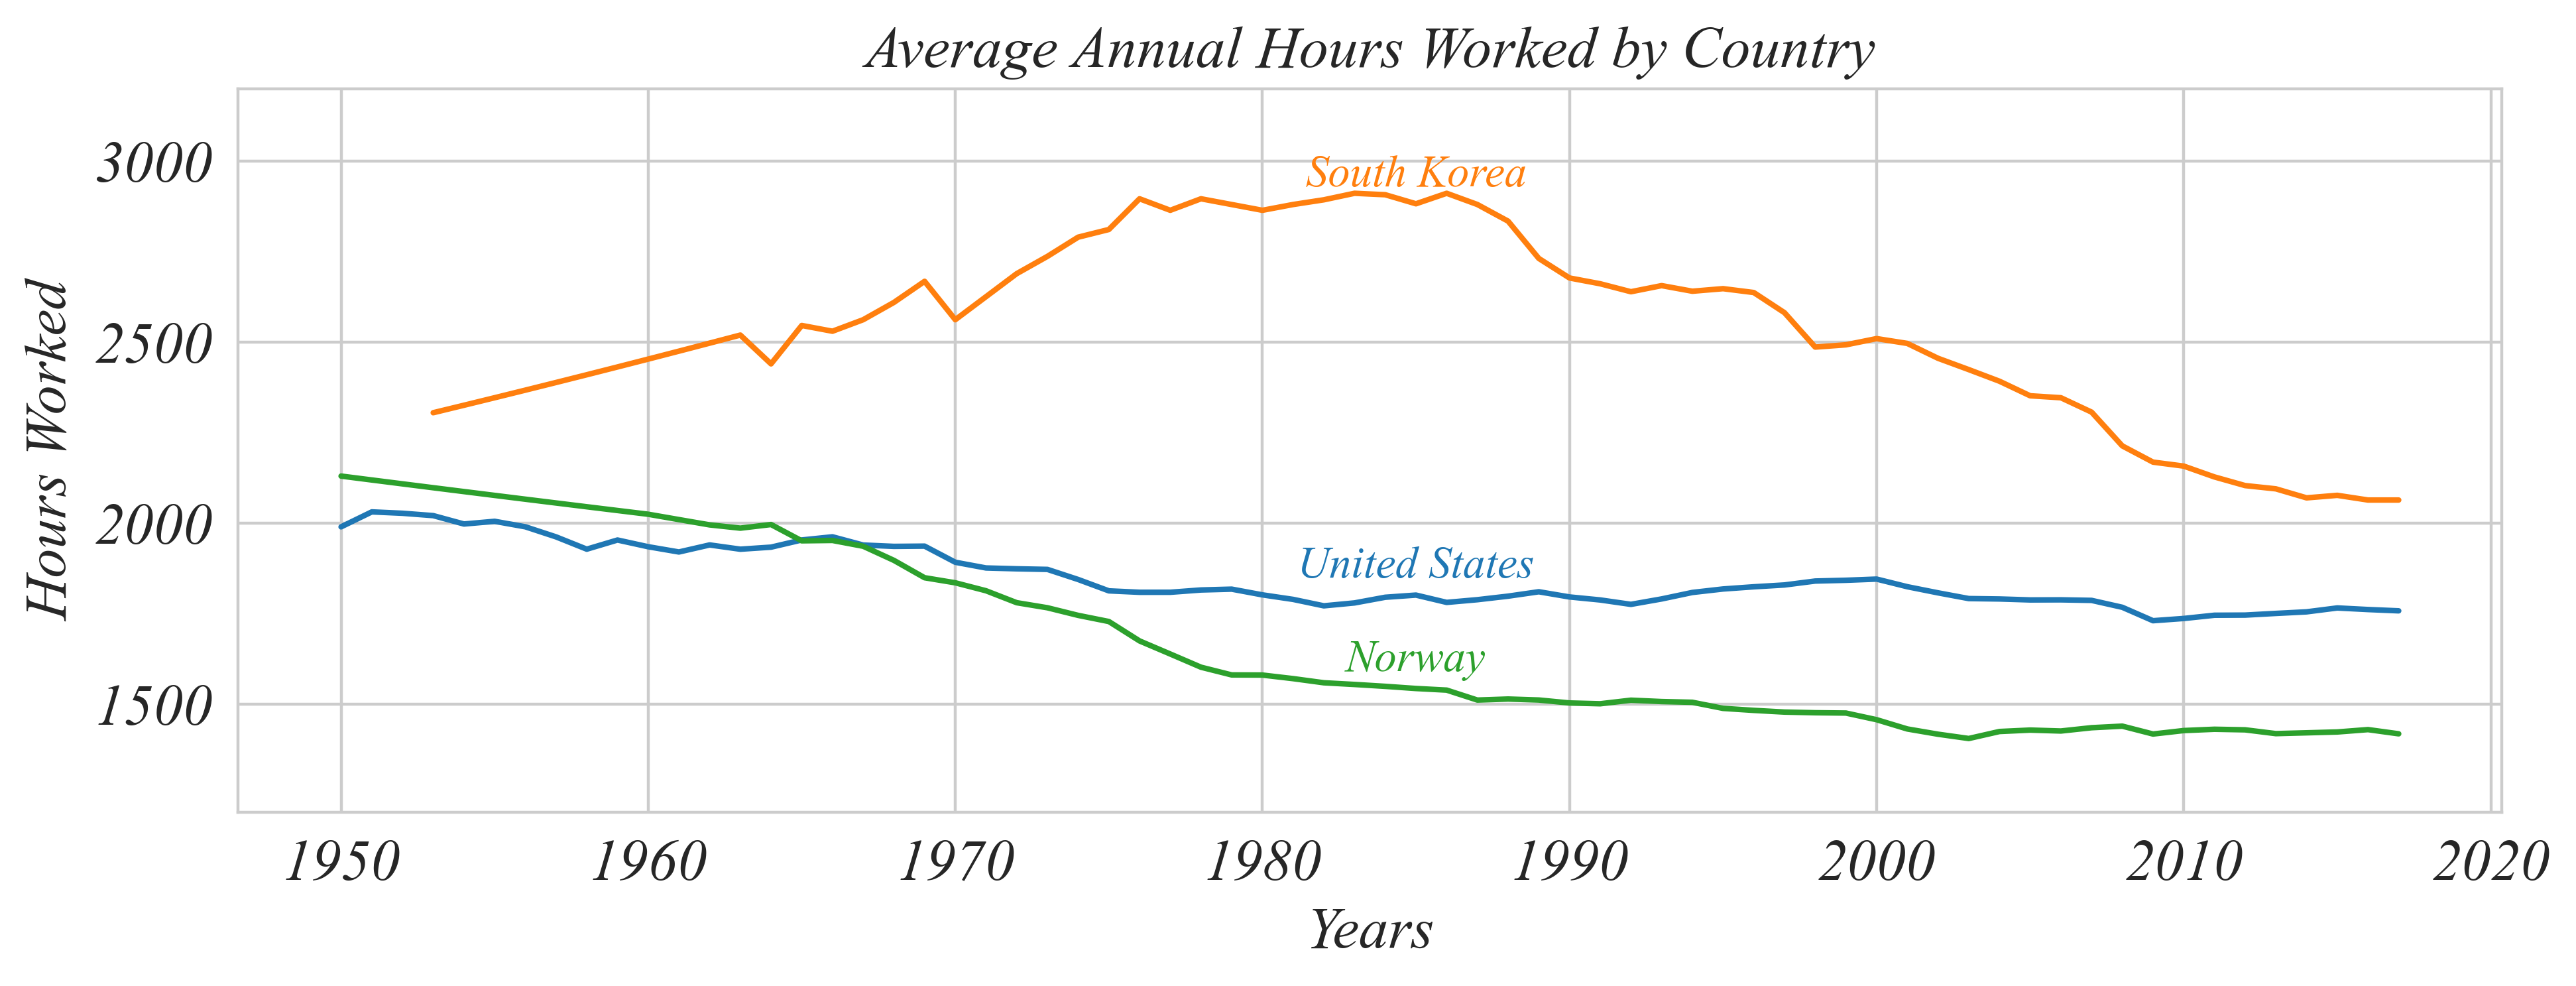

In [9]:
hours = pd.read_csv('Data/Annual_Working_Hours_full.csv')
hours.rename(columns={'Average annual working hours per worker': 'Hours'}, inplace=True)

sns.set_style('whitegrid')
plt.rcParams.update({
    'font.family': 'serif',        # Set the font family
    'font.serif': ['Times New Roman'], # Use a specific serif font
    'font.size': 16,               # Set the general font size
    'axes.titlesize': 16,          # Set the font size of the title
    'axes.labelsize': 16,           # Set the font size of axis labels
    'font.style': 'italic',
})

plt.figure(figsize=(10, 4), dpi=400)

for entity in ['United States', 'South Korea', 'Norway']:
    subhours = hours[hours.Entity == entity]
    subhours = subhours[subhours.Year >= 1950]
    line, = plt.plot(subhours.Year, subhours.Hours)

    line_color = line.get_color()

    year = 1985
    y_2015 = subhours[subhours.Year == year].Hours
    plt.annotate(
        entity,
        xy=(year, y_2015),  # Point to annotate
        xytext=(year, y_2015 + 50),  # Position of the text
        fontsize=12,
        ha='center',
        color=line_color
    )

plt.ylabel('Hours Worked')
plt.ylim(1200, 3200)

plt.xlabel('Years')
plt.grid(True)

plt.title('Average Annual Hours Worked by Country')
plt.tight_layout()
plt.savefig('Figures/HW_1_Q2.png')

In [121]:
rate_all = pd.read_csv('Data/Marriage_Rates_full.csv')
rate_all.rename(columns={'Crude marriage rate (per 1,000 inhabitants)':'Marriage Rate'}, inplace=True)
rate = rate_all#[rate_all.Year == 2016]
#rate

In [120]:
code = pd.read_csv('Data/Country_Code_Continents.csv')
code.rename(columns={'ISO (3)':'Code'}, inplace=True)
code.Continent.unique()

array(['Asia', 'Europe', 'Africa', 'Oceania', 'Americas'], dtype=object)

In [217]:
country_rates.Continent.values[0]

'Africa'

In [236]:
rates = pd.merge(code, rate, on='Code')[['Continent', 'Country', 'Year', 'Marriage Rate']]
rates.Continent.unique()

rate_list = []
for country in rates.Country.unique():
    country_rates = rates[rates.Country == country]
    recent_year = country_rates.Year.max()
    if recent_year > 1900:
        african_countries = ['Algeria', 'Angola', 
               'Djibouti', 'Egypt', 'Equatorial Guinea', 'Ethiopia',
               'Equatorial Guinea', 'Mozambique',
               'Sao Tome and Principe', 'Guinea-Bissau', 'Equatorial Guinea']
        if country_rates.Continent.values[0] != 'Africa' or country in african_countries:
            rate_list.append(country_rates[country_rates.Year == recent_year])
recent_rate = pd.concat(rate_list)

#recent_rate = recent_rate[recent_rate.Country.isin(african_countries)]
#recent_rate = recent_rate.sample(int(len(recent_rate)/3))
recent_rate.Continent.unique()
recent_rate[['Continent', 'Country', 'Marriage Rate']].to_csv('Data/Marriage_Rates.csv')

In [237]:
recent_rate[(recent_rate.Continent == 'Africa')]

,Continent,Country,Year,Marriage Rate
57,Africa,Algeria,2007,9.6
73,Africa,Angola,1970,4.3
850,Africa,Djibouti,1999,5.4
869,Africa,Egypt,2006,7.2
875,Africa,Equatorial Guinea,1966,0.8
934,Africa,Ethiopia,1999,9.3
1201,Africa,Guinea-Bissau,1971,0.2
2045,Africa,Mozambique,1970,1.0
2435,Africa,Sao Tome and Principe,1988,0.4


In [226]:
recent_rate[(recent_rate.Continent == 'Africa') & (recent_rate['Marriage Rate'] < 2)]

,Continent,Country,Year,Marriage Rate
875,Africa,Equatorial Guinea,1966,0.8
1201,Africa,Guinea-Bissau,1971,0.2
2045,Africa,Mozambique,1970,1.0
2435,Africa,Sao Tome and Principe,1988,0.4


In [234]:
recent_rate[(recent_rate['Marriage Rate'] > 20) | (recent_rate['Marriage Rate'] < 1)]

,Continent,Country,Year,Marriage Rate
80,Americas,Antigua and Barbuda,1995,21.000000
556,Oceania,Cook Islands,2007,59.000000
875,Africa,Equatorial Guinea,1966,0.800000
1201,Africa,Guinea-Bissau,1971,0.200000
2268,Oceania,Pitcairn Islands,1992,37.000000
2435,Africa,Sao Tome and Principe,1988,0.400000
3007,Americas,Virgin Islands,1993,34.200001
3016,Asia,Yemen,2002,0.600000


In [229]:
recent_rate[(recent_rate.Continent == 'Oceania') & (recent_rate['Marriage Rate'] > 10)]

,Continent,Country,Year,Marriage Rate
556,Oceania,Cook Islands,2007,59.0
2188,Oceania,Northern Mariana Islands,1989,17.4
2268,Oceania,Pitcairn Islands,1992,37.0


### Q1. Understanding Continuous Variables Visually

The following data from the Better Life Index was collected from OECD countries use using time-use surveys. This question is aimed at practicing the skill of analyzing continuous variables displayed visually. 


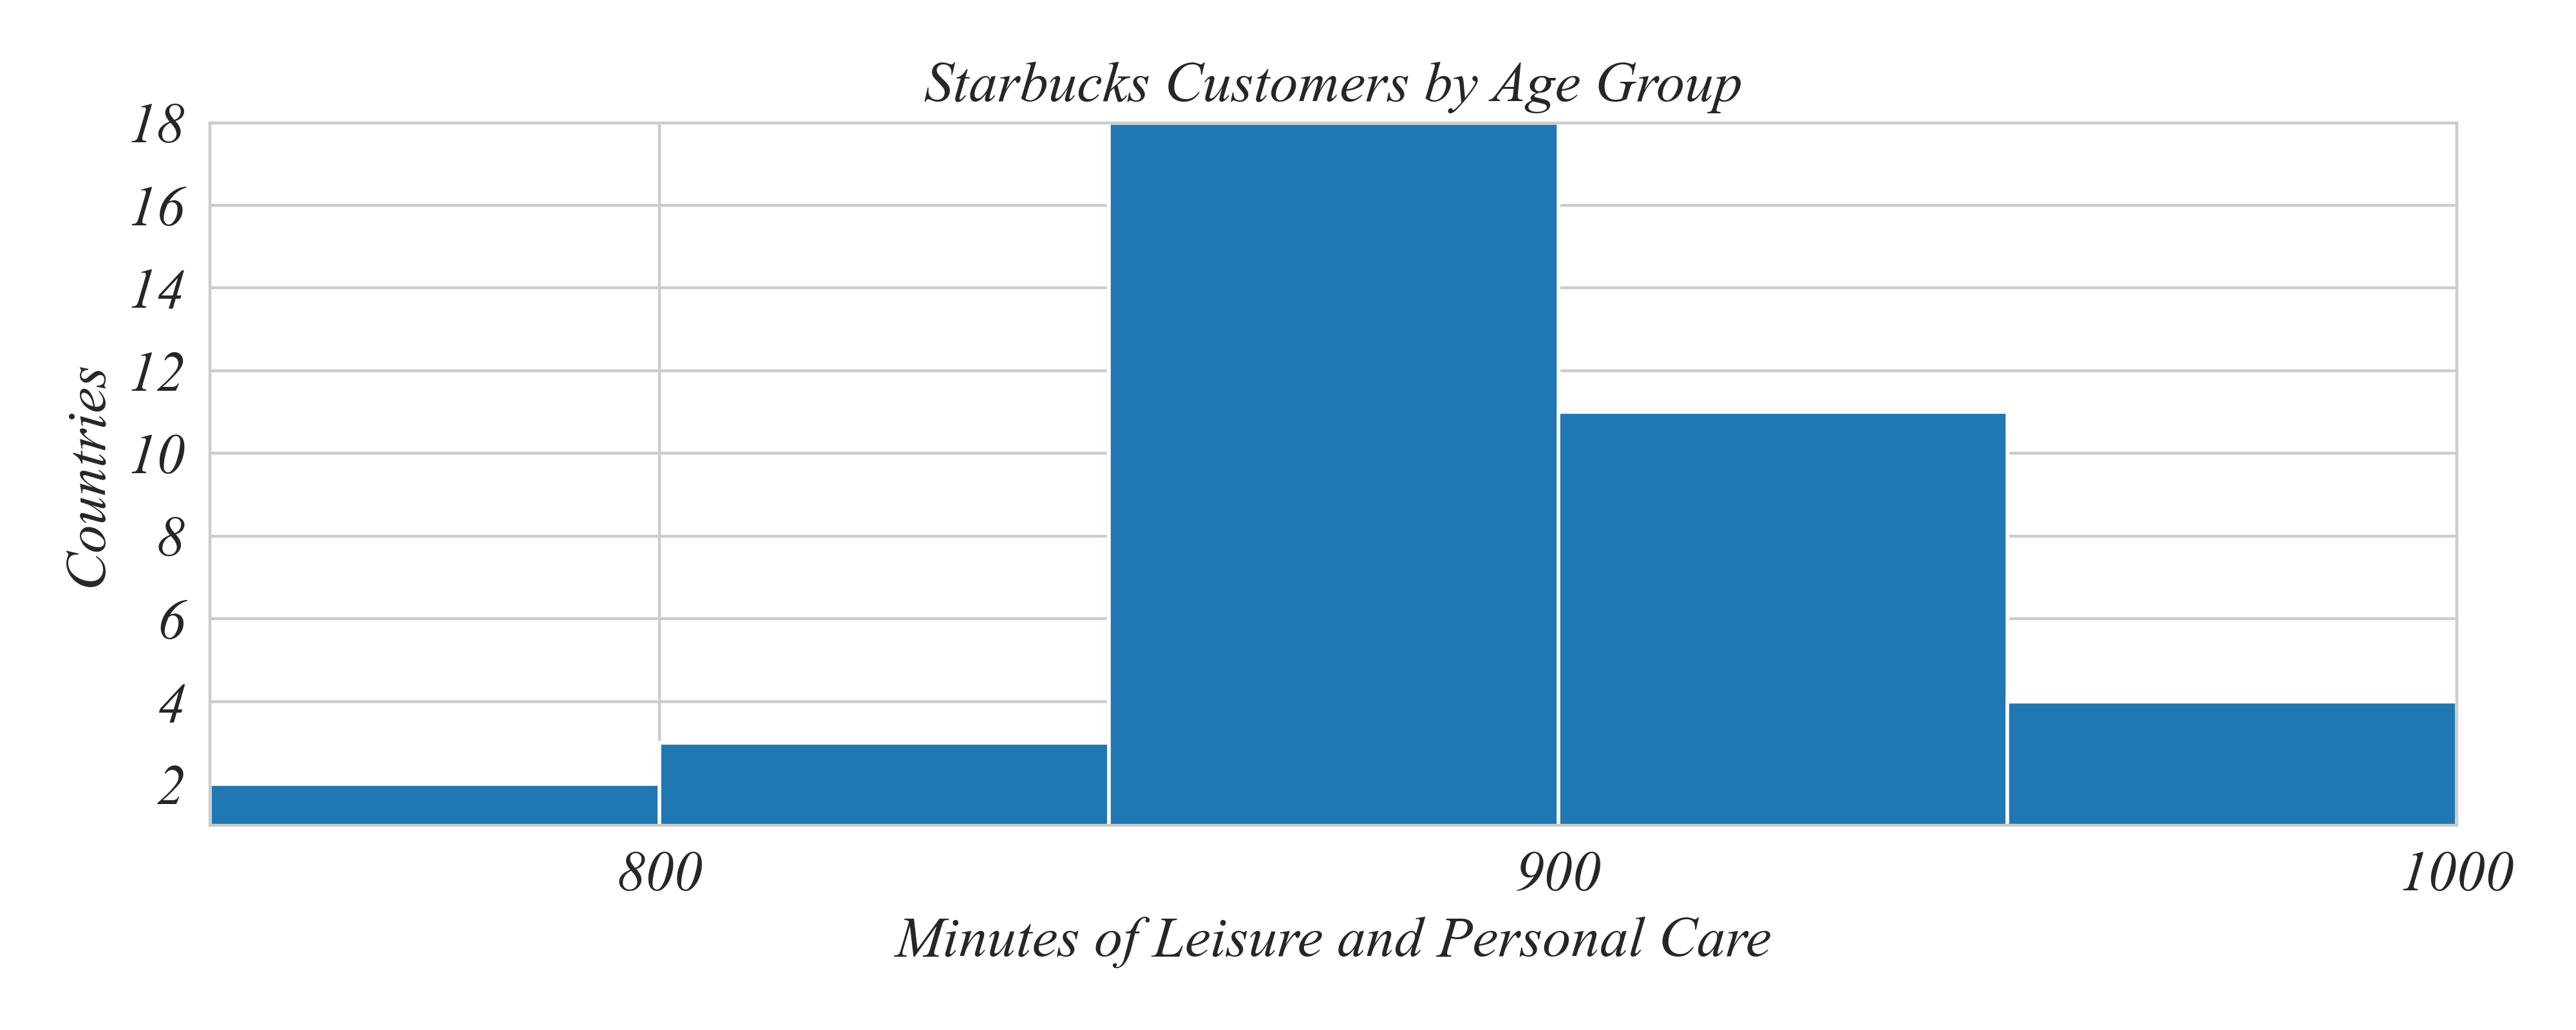

In [36]:
# NB_Writer: \includegraphics[width=\textwidth]
Image('Figures/HW_1_Q1.png')

a. What is the most common 50 minute range of time spent on leisure?
$\vspace{0.5cm}$

b. In how many countries do people spend between 800 and 850 minutes on leisure and personal care?
$\vspace{0.5cm}$

c. How many countries spend more than 900 minutes on leisure and personal care?
$\vspace{0.5cm}$

d. What is the approximate difference between the two most common ranges?
$\vspace{0.5cm}$


$\pagebreak$

### Q2. Making Comparisons with Continuous Variables

The following data on hours worked is available from Our World in Data. This question is aimed at practicing the skill of making comparisons of continuous variables displayed visually. 


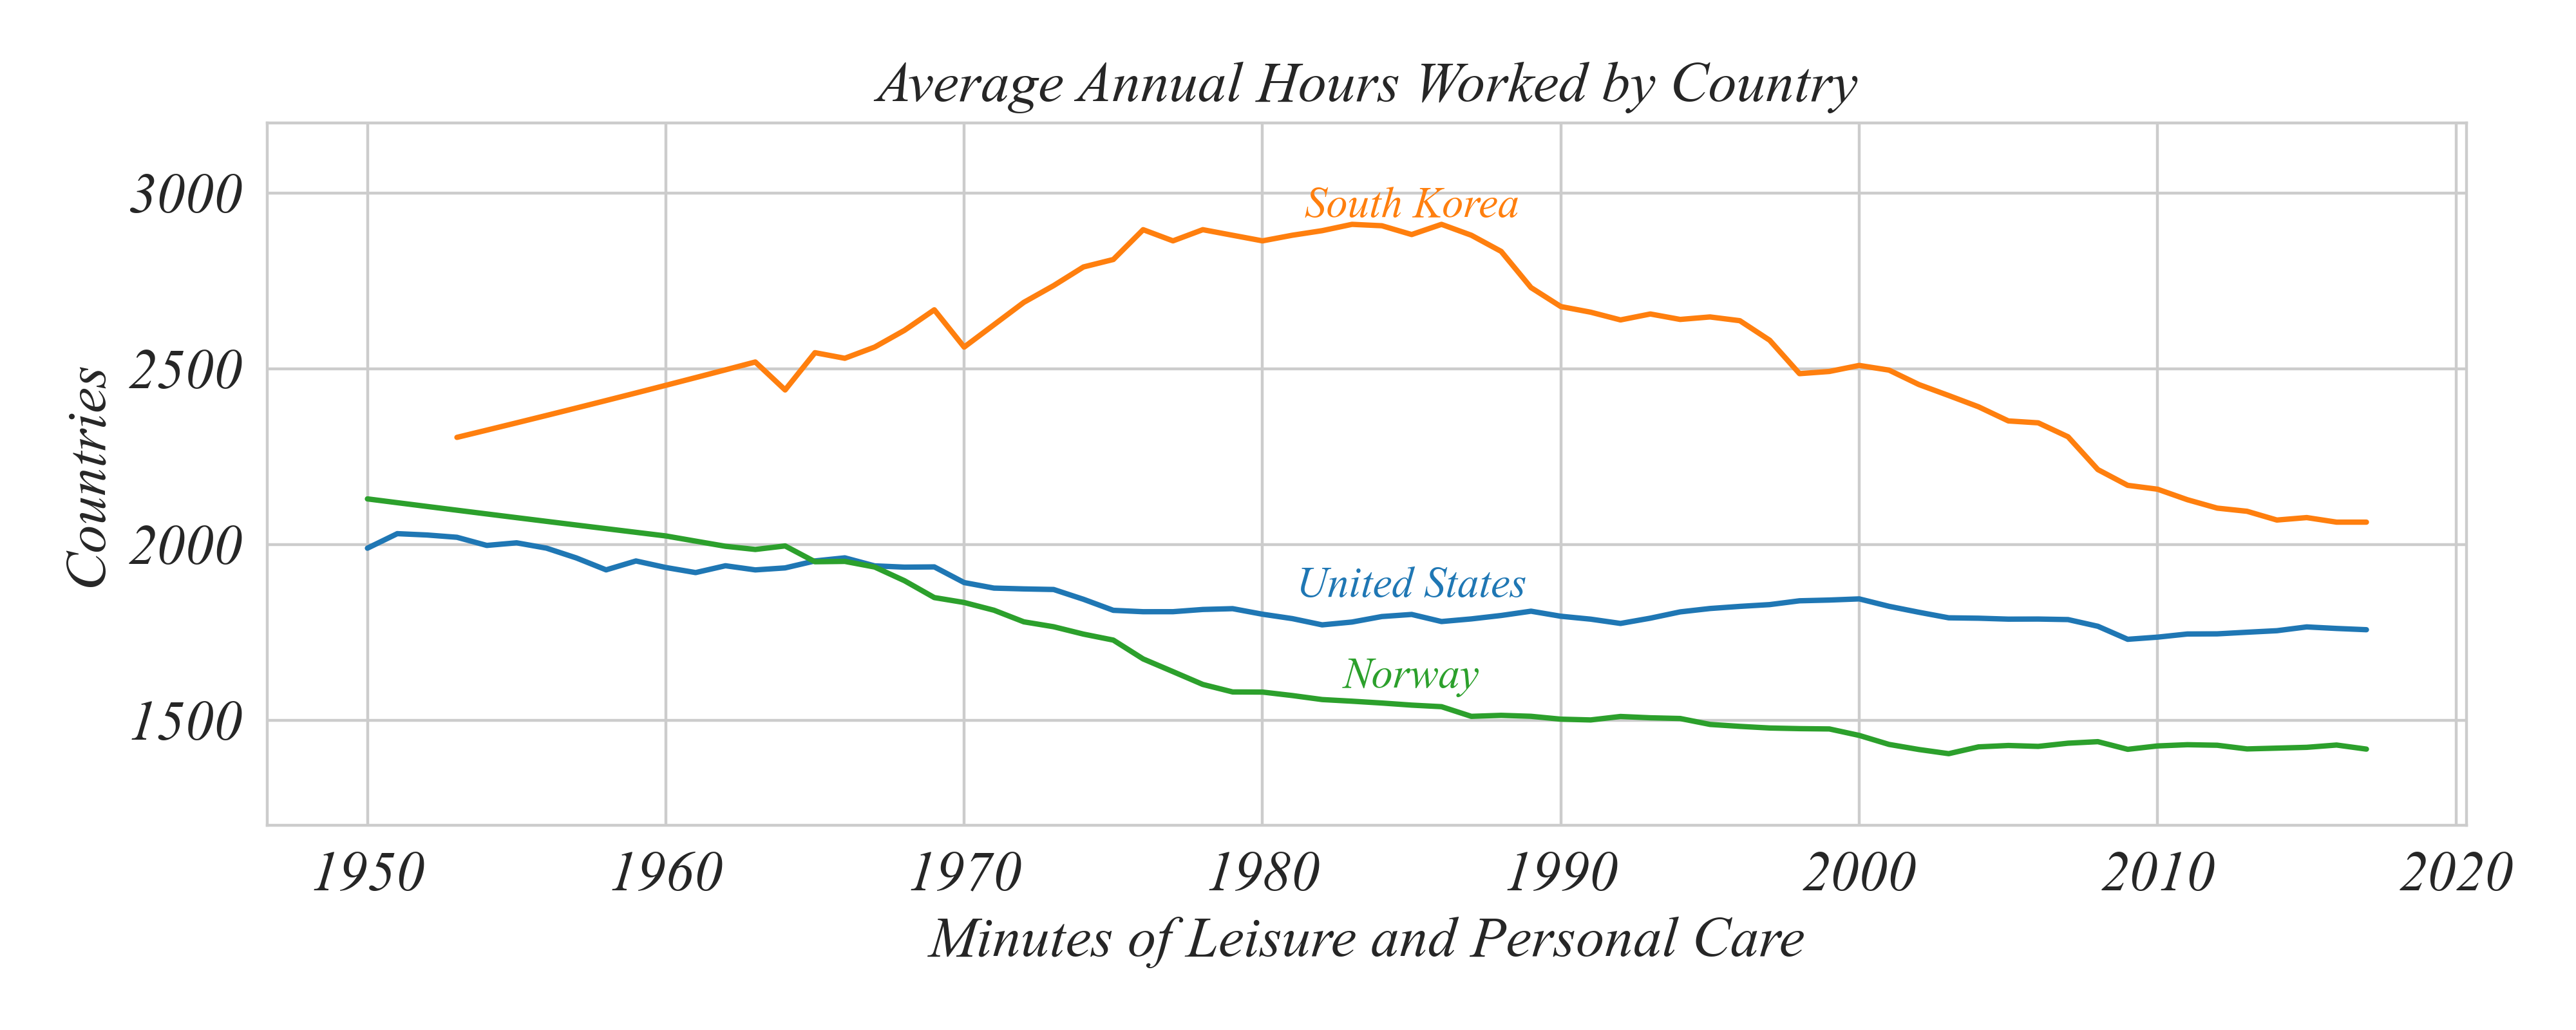

In [70]:
# NB_Writer: \includegraphics[width=\textwidth]
Image('Figures/HW_1_Q2.png')

a. In which country did people work the most on average?

- South Korea
- United States
- Norway

b. When did Norwegians work less than Americans?

- Before 1965
- During 1965
- After 1965
- Never

c. When was the largest difference between the longest and the shortest annual working time?

- 1960s
- 1980s
- 2000s
- 2010s

d. In the 1980s, roughly how many times more did an average South Korean work than an average Norwegian?

- 2x
- 3x
- 4x
- 5x
